<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/My%20HW/MiniP0/MiniP0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
print("Machine Learning Homework 1 by Reza Lari 40316956, any explanation needed is commented or printed using print")

Machine Learning Homework 1 by Reza Lari 40316956, any explanation needed is commented or printed using print


# Question 3-i-الف

In [ ]:
print("سوال آ-1- فرمت فایل دانلود شده MAT. می باشد و به کمک دستور mat=scipy.io.loadmat('matlabfile.mat') از کتابخانه scipy آن را میخوانیم")

سوال آ-1- فرمت فایل دانلود شده MAT. می باشد و به کمک دستور mat=scipy.io.loadmat('matlabfile.mat') از کتابخانه scipy آن را میخوانیم


In [ ]:
mat=scipy.io.loadmat('matlabfile.mat')
print(type(mat))
print(mat)

<class 'dict'>
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:54:30 2000', '__version__': '1.0', '__globals__': [], 'X136_DE_time': array([[ 0.08471867],
       [ 0.69486   ],
       [ 1.15976933],
       ...,
       [ 1.07964133],
       [ 0.24330533],
       [-0.57258133]], shape=(486804, 1)), 'X136_FE_time': array([[-0.21634364],
       [-0.29975818],
       [-0.27058364],
       ...,
       [ 0.01808   ],
       [-0.11217818],
       [-0.19538727]], shape=(486804, 1)), 'X136RPM': array([[1774]], dtype=uint16)}


In [ ]:
print("سوال آ-2- اجزای این دیکشنری از جنس uint16 میباشند و از 3 آرایه که دوتا با سایز (486804,1) و یکی 1774 با نام های X136_DE_time , X136_FE_time , X136RPM تشکیل شده است ")


سوال آ-2- اجزای این دیکشنری از جنس uint16 میباشند و از 3 آرایه که دوتا با سایز (486804,1) و یکی 1774 با نام های X136_DE_time , X136_FE_time , X136RPM تشکیل شده است 


In [ ]:
signal1=mat["X136_DE_time"]
print(type(signal1))

<class 'numpy.ndarray'>


# Question 3-i-ب

In [ ]:
#Creating time vector for whole 0-10 s
print(signal1.size)

486804


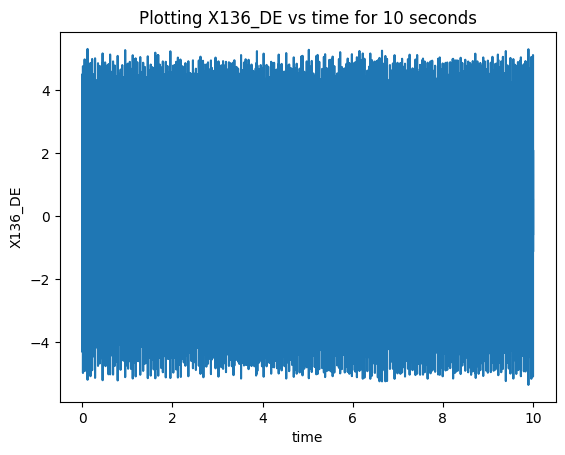

In [ ]:
times2=np.linspace(0,10,486804)
plt.plot(times2,signal1)
plt.title("Plotting X136_DE vs time for 10 seconds")
plt.xlabel("time")
plt.ylabel("X136_DE")
plt.show()

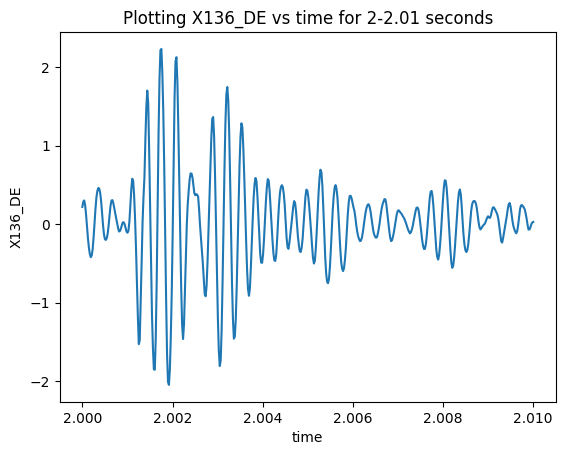

In [ ]:
# Creating Time Vector for 2 to 2.01 s
times=np.linspace(2,2.01,480)
plt.plot(times,signal1[48000*2:48000*2+480])
plt.title("Plotting X136_DE vs time for 2-2.01 seconds")
plt.xlabel("time")
plt.ylabel("X136_DE")
plt.show()

# Question 3-i-ج

In [ ]:
def plot_fft_polar(inputt, fs):
    n=len(inputt)  #Used for creating frequencies
    fft_inputt=np.fft.fft(inputt) #Performs fft
    freqs=np.fft.fftfreq(n,1/fs) #Creating frequencies for plot
    fft_magnitude=np.abs(fft_inputt) #magnitude
    fft_phase=np.angle(fft_inputt)  #phase
    plt.subplot(1, 2, 1)
    plt.plot(freqs,fft_magnitude)
    plt.title('Magnitude')
    plt.ylabel('Magnitude')
    plt.xlabel('Frequency')
    plt.subplot(1, 2, 2)
    plt.plot(freqs,fft_phase)
    plt.title('Phase')
    plt.ylabel('Phase')
    plt.xlabel('Frequency')
    plt.show()

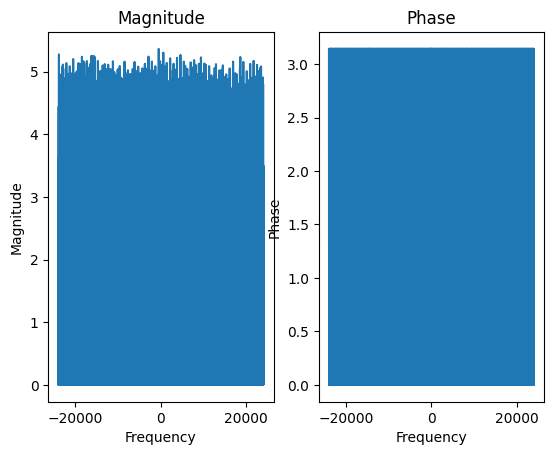

In [ ]:
fsample=48000
plot_fft_polar(signal1,fsample)

In [ ]:
def fft_polar_dominant(inputt, fs):
    n=len(inputt)
    fft_inputt=np.fft.fft(inputt) #Performs fft
    freqs=np.fft.fftfreq(n,1/fs)
    fft_magnitude=np.abs(fft_inputt)
    max_index = np.argmax(fft_magnitude)
    max_freq = np.abs(freqs[max_index])
    max_magnitude = fft_magnitude[max_index]
    print("Max Frequency: ", max_freq, "\n Max Magnitude: ", max_magnitude)

In [ ]:
fft_polar_dominant(signal1,fsample)

Max Frequency:  499.7165183523553 
 Max Magnitude:  [5.363568]


# Question 3-i-د

In [ ]:
def segmentation(signal, segment_size, overlap):
    step = segment_size-overlap  #Steps of incrementing used for creating segments
    segments=[signal[i:i + segment_size] for i in range(0, len(signal) - segment_size + 1, step)] #segmentation based on inputs and step incrementation
    return np.array(segments) #returns a numpy array as requested

In [ ]:
segmented_signal = segmentation(signal1, segment_size=128, overlap=64)
segmented_signal = segmented_signal.squeeze(-1)  # Removes the last dimension if it's -1
print(segmented_signal.shape)

(7605, 128)


# Question 3-i-ه

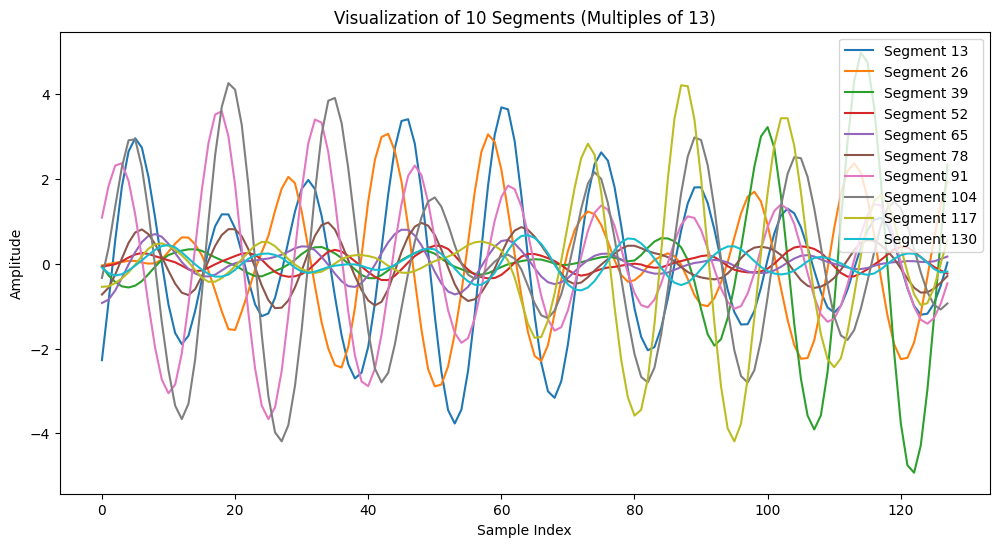

In [ ]:
df_segments = pd.DataFrame(segmented_signal)
selected_segments = df_segments.iloc[::13].head(11).tail(-1).values #.tail(-1) for removing 1st row
#selected_segments
plt.figure(figsize=(12, 6))
for i, segment in enumerate(selected_segments):
    plt.plot(segment, label=f"Segment {(i+1)*13}")

plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Visualization of 10 Segments (Multiples of 13)")
plt.legend()
plt.show()

# Question 3-i-و

In [ ]:
#part 1 , 2
def msr(signal):
    me_sd_rms=pd.DataFrame({"Mean":[signal.mean()], "Standard Deviation":[signal.std()], "RMS":[np.sqrt((signal**2).mean())]})
    return me_sd_rms

In [ ]:
me_std_rms=msr(signal1)
me_std_rms

,Mean,Standard Deviation,RMS
0,0.012112,1.06064,1.060709


In [ ]:
me_std_rms.to_csv("mean_std_rms.csv", index=False)#index=false prevents indices from being
#saved

# Question 3-ii  Iris Dataset
### Question 3-ii-آ

In [ ]:
print("""
دادگان گل زنبق (Iris Dataset) یکی از مشهورترین مجموعه داده‌ها در یادگیری ماشین و آمار است که توسط رونالد فیشر در سال ۱۹۳۶ معرفی شد. این مجموعه شامل ۱۵۰ نمونه از گل‌های زنبق در سه گونه‌ی مختلف (Setosa، Versicolor و Virginica) است. هر نمونه دارای ۴ ویژگی عددی می‌باشد: طول و عرض کاسبرگ (Sepal) و طول و عرض گلبرگ (Petal). این ویژگی‌ها به ما کمک می‌کنند تا گونه‌ی گل را به درستی دسته‌بندی کنیم.

یکی از دلایل محبوبیت این دادگان، سادگی و در عین حال قدرت آن در آزمایش الگوریتم‌های یادگیری ماشین است. بسیاری از مدل‌های دسته‌بندی، مانند ماشین بردار پشتیبان (SVM)، درخت تصمیم (Decision Tree)، و شبکه‌های عصبی مصنوعی، بر روی این مجموعه داده آموزش داده می‌شوند تا عملکرد آن‌ها مقایسه شود. به دلیل ویژگی‌های عددی و توزیع منظم داده‌ها، این مجموعه گزینه‌ای عالی برای یادگیری و پیاده‌سازی تکنیک‌های تحلیل داده و یادگیری ماشین است.

در این دادگان، گونه‌ی Setosa معمولاً به راحتی از دو گونه‌ی دیگر جدا می‌شود، اما گونه‌های Versicolor و Virginica دارای هم‌پوشانی هستند، که این موضوع چالش‌هایی را برای مدل‌های دسته‌بندی ایجاد می‌کند. با استفاده از روش‌های مختلف مانند تحلیل مؤلفه‌های اصلی (PCA) یا رسم نمودارهای جعبه‌ای، می‌توان این داده‌ها را بهتر درک کرد. به طور کلی، دادگان گل زنبق یکی از بهترین گزینه‌ها برای آموزش و تست مدل‌های یادگیری ماشین است و همچنان به عنوان یک استاندارد در این حوزه استفاده می‌شود.
""")




دادگان گل زنبق (Iris Dataset) یکی از مشهورترین مجموعه داده‌ها در یادگیری ماشین و آمار است که توسط رونالد فیشر در سال ۱۹۳۶ معرفی شد. این مجموعه شامل ۱۵۰ نمونه از گل‌های زنبق در سه گونه‌ی مختلف (Setosa، Versicolor و Virginica) است. هر نمونه دارای ۴ ویژگی عددی می‌باشد: طول و عرض کاسبرگ (Sepal) و طول و عرض گلبرگ (Petal). این ویژگی‌ها به ما کمک می‌کنند تا گونه‌ی گل را به درستی دسته‌بندی کنیم.

یکی از دلایل محبوبیت این دادگان، سادگی و در عین حال قدرت آن در آزمایش الگوریتم‌های یادگیری ماشین است. بسیاری از مدل‌های دسته‌بندی، مانند ماشین بردار پشتیبان (SVM)، درخت تصمیم (Decision Tree)، و شبکه‌های عصبی مصنوعی، بر روی این مجموعه داده آموزش داده می‌شوند تا عملکرد آن‌ها مقایسه شود. به دلیل ویژگی‌های عددی و توزیع منظم داده‌ها، این مجموعه گزینه‌ای عالی برای یادگیری و پیاده‌سازی تکنیک‌های تحلیل داده و یادگیری ماشین است.

در این دادگان، گونه‌ی Setosa معمولاً به راحتی از دو گونه‌ی دیگر جدا می‌شود، اما گونه‌های Versicolor و Virginica دارای هم‌پوشانی هستند، که این موضوع چالش‌هایی را برای مدل‌های دسته‌بند

In [ ]:
from sklearn import datasets
# load iris dataset
iris_dataset = datasets.load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset.data, iris_dataset.target,test_size=0.2, random_state=56) #Student Number= 40316956

In [ ]:
iris_df_train = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_df_train["target"] = y_train
iris_df_train["train_test"] = 0

In [ ]:
iris_df_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,train_test
0,6.8,3.0,5.5,2.1,2,0
1,5.8,2.7,5.1,1.9,2,0
2,6.3,2.5,4.9,1.5,1,0
3,5.0,3.5,1.3,0.3,0,0
4,4.4,3.0,1.3,0.2,0,0
...,...,...,...,...,...,...
115,6.3,2.3,4.4,1.3,1,0
116,5.8,2.7,5.1,1.9,2,0
117,7.7,2.8,6.7,2.0,2,0
118,6.8,3.2,5.9,2.3,2,0


In [ ]:
iris_df_test = pd.DataFrame(X_test, columns=iris_dataset.feature_names)
iris_df_test["target"] = y_test
iris_df_test["train_test"] = 1

In [ ]:
iris_df_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,train_test
0,6.4,3.1,5.5,1.8,2,1
1,5.1,2.5,3.0,1.1,1,1
2,6.7,3.0,5.0,1.7,1,1
3,6.9,3.1,5.1,2.3,2,1
4,6.9,3.2,5.7,2.3,2,1
5,6.7,3.0,5.2,2.3,2,1
6,6.3,2.5,5.0,1.9,2,1
7,5.0,3.2,1.2,0.2,0,1
8,4.8,3.0,1.4,0.1,0,1
9,6.1,3.0,4.9,1.8,2,1


In [ ]:
iris_df = pd.concat([iris_df_train, iris_df_test], ignore_index=True) #concatinating datas
iris_df     # in last column, 1 is for test datas and 0 is for training datas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,train_test
0,6.8,3.0,5.5,2.1,2,0
1,5.8,2.7,5.1,1.9,2,0
2,6.3,2.5,4.9,1.5,1,0
3,5.0,3.5,1.3,0.3,0,0
4,4.4,3.0,1.3,0.2,0,0
...,...,...,...,...,...,...
145,6.5,3.0,5.8,2.2,2,1
146,7.6,3.0,6.6,2.1,2,1
147,6.1,2.9,4.7,1.4,1,1
148,6.1,2.8,4.7,1.2,1,1


# Question 3-ii-ب

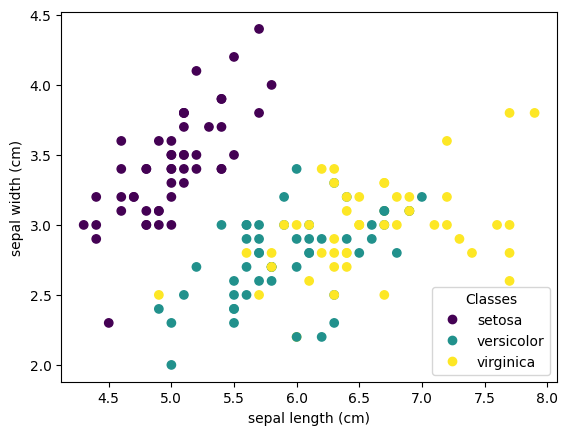

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df["target"])
ax.set(xlabel=iris_df.columns[0], ylabel=iris_df.columns[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris_dataset.target_names, loc="lower right", title="Classes"
)
#This creates a scatter plot of the first two features of the Iris dataset, color-coded by class

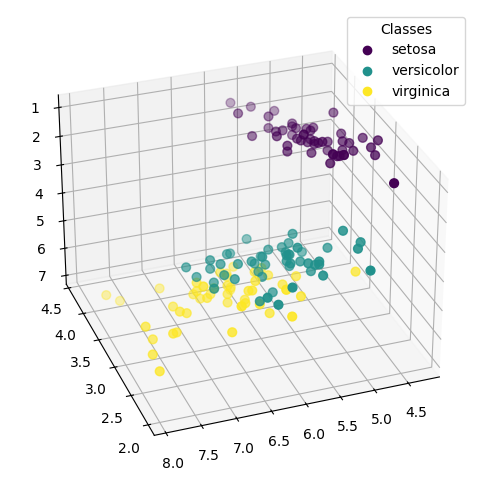

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    iris_df.iloc[:, 0],
    iris_df.iloc[:, 1],
    iris_df.iloc[:, 2],
    c=iris_df["target"],
    s=40,
)
_ = ax.legend(
    scatter.legend_elements()[0], iris_dataset.target_names, loc="upper right", title="Classes"
)

In [ ]:
import seaborn as sns
corr_matrix = iris_df.iloc[:, 0:4].corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


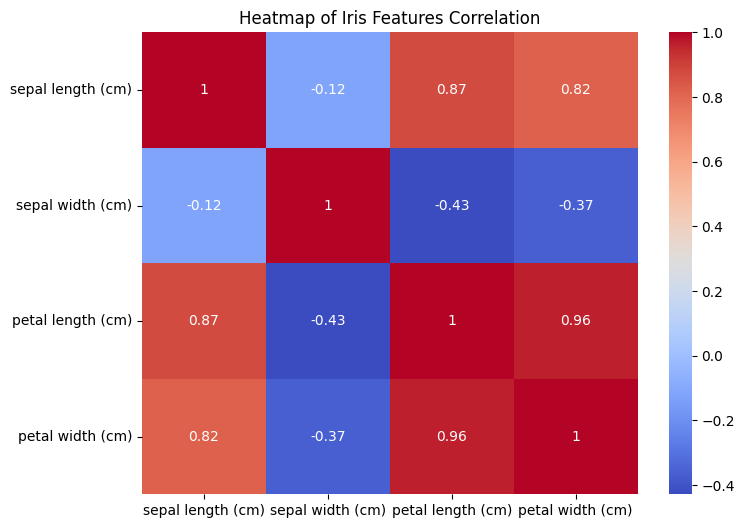

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Iris Features Correlation')
plt.show() #Heatmap is USED TO SHOW CORRELATION HERE

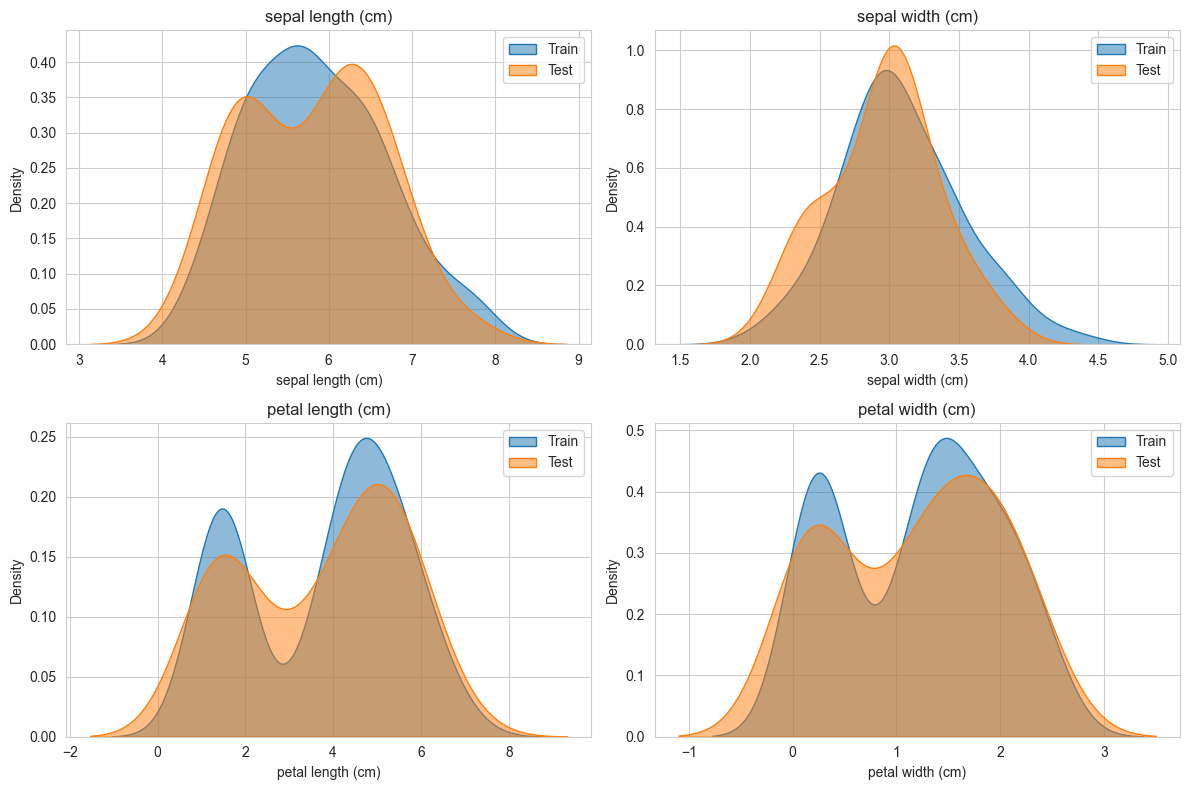

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(iris_dataset.feature_names):
    sns.kdeplot(iris_df_train[feature], label="Train", fill=True, alpha=0.5, ax=axes[i])
    sns.kdeplot(iris_df_test[feature], label="Test", fill=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Question 3-ii-ج

In [ ]:
feature = 'sepal length (cm)'

# Compute percentiles to define class boundaries
low_threshold = np.percentile(iris_df[feature], 33)  # 33rd percentile
high_threshold = np.percentile(iris_df[feature], 66) # 66th percentile
print(low_threshold)
print(high_threshold)

def discretize(value):
    if value <= low_threshold:
        return 0
    elif value <= high_threshold:
        return 1
    else:
        return 2

iris_df['sepal_length_category'] = iris_df[feature].apply(discretize)

5.4
6.234


In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,train_test,sepal_length_category
0,6.8,3.0,5.5,2.1,2,0,2
1,5.8,2.7,5.1,1.9,2,0,1
2,6.3,2.5,4.9,1.5,1,0,2
3,5.0,3.5,1.3,0.3,0,0,0
4,4.4,3.0,1.3,0.2,0,0,0
...,...,...,...,...,...,...,...
145,6.5,3.0,5.8,2.2,2,1,2
146,7.6,3.0,6.6,2.1,2,1,2
147,6.1,2.9,4.7,1.4,1,1,1
148,6.1,2.8,4.7,1.2,1,1,1


# Question 3-ii-د

In [ ]:
iris_dataset.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
setosa_df = iris_df[iris_df['target'] == 0]

setosa_stats = setosa_df.describe()

In [ ]:
setosa_stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,train_test,sepal_length_category
count,50.00000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000,0.0,0.200000,0.100000
std,0.35249,0.379064,0.173664,0.105386,0.0,0.404061,0.303046
min,4.30000,2.300000,1.000000,0.100000,0.0,0.000000,0.000000
25%,4.80000,3.200000,1.400000,0.200000,0.0,0.000000,0.000000
50%,5.00000,3.400000,1.500000,0.200000,0.0,0.000000,0.000000
75%,5.20000,3.675000,1.575000,0.300000,0.0,0.000000,0.000000
max,5.80000,4.400000,1.900000,0.600000,0.0,1.000000,1.000000


In [ ]:
print("Code written by Reza Lari 40316956, Chatgpt is used to improve the code as well")

Code written by Reza Lari 40316956, Chatgpt is used to improve the code as well
